In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
# building volcab for characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [68]:
# build the dataset
block_size = 3 # context length: how many chs do we take to predict the next one. It's fixed here. 
X, Y = [], []
for w in words:
#     print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [69]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [10]:
C = torch.randn((27, 2))

In [12]:
C[5]

tensor([-1.2803, -0.6814])

In [15]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.2803, -0.6814])

In [19]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [22]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

tensor([[-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.2803, -0.6814],
        [-1.0833, -0.4459, -1.2803, -0.6814,  1.6749,  0.5580],
        [-1.2803, -0.6814,  1.6749,  0.5580,  1.6749,  0.5580],
        [ 1.6749,  0.5580,  1.6749,  0.5580, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -0.8195, -0.2994],
        [-1.0833, -0.4459, -0.8195, -0.2994,  1.0779,  0.4264],
        [-0.8195, -0.2994,  1.0779,  0.4264, -0.4634,  0.6024],
        [ 1.0779,  0.4264, -0.4634,  0.6024, -0.1530,  0.7711],
        [-0.4634,  0.6024, -0.1530,  0.7711, -0.4634,  0.6024],
        [-0.1530,  0.7711, -0.4634,  0.6024, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.7591, -1.0244, -0.1530,  0.7711],
        [-1.7591, -1.0244, -0.1530,  0.7

In [24]:
torch.reshape(emb, (32, 6))

tensor([[-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.2803, -0.6814],
        [-1.0833, -0.4459, -1.2803, -0.6814,  1.6749,  0.5580],
        [-1.2803, -0.6814,  1.6749,  0.5580,  1.6749,  0.5580],
        [ 1.6749,  0.5580,  1.6749,  0.5580, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -0.8195, -0.2994],
        [-1.0833, -0.4459, -0.8195, -0.2994,  1.0779,  0.4264],
        [-0.8195, -0.2994,  1.0779,  0.4264, -0.4634,  0.6024],
        [ 1.0779,  0.4264, -0.4634,  0.6024, -0.1530,  0.7711],
        [-0.4634,  0.6024, -0.1530,  0.7711, -0.4634,  0.6024],
        [-0.1530,  0.7711, -0.4634,  0.6024, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.7591, -1.0244, -0.1530,  0.7711],
        [-1.7591, -1.0244, -0.1530,  0.7

In [26]:
torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.2803, -0.6814],
        [-1.0833, -0.4459, -1.2803, -0.6814,  1.6749,  0.5580],
        [-1.2803, -0.6814,  1.6749,  0.5580,  1.6749,  0.5580],
        [ 1.6749,  0.5580,  1.6749,  0.5580, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -0.8195, -0.2994],
        [-1.0833, -0.4459, -0.8195, -0.2994,  1.0779,  0.4264],
        [-0.8195, -0.2994,  1.0779,  0.4264, -0.4634,  0.6024],
        [ 1.0779,  0.4264, -0.4634,  0.6024, -0.1530,  0.7711],
        [-0.4634,  0.6024, -0.1530,  0.7711, -0.4634,  0.6024],
        [-0.1530,  0.7711, -0.4634,  0.6024, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.7591, -1.0244, -0.1530,  0.7711],
        [-1.7591, -1.0244, -0.1530,  0.7

In [30]:
emb.view((32, 6))

tensor([[-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.2803, -0.6814],
        [-1.0833, -0.4459, -1.2803, -0.6814,  1.6749,  0.5580],
        [-1.2803, -0.6814,  1.6749,  0.5580,  1.6749,  0.5580],
        [ 1.6749,  0.5580,  1.6749,  0.5580, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -0.8195, -0.2994],
        [-1.0833, -0.4459, -0.8195, -0.2994,  1.0779,  0.4264],
        [-0.8195, -0.2994,  1.0779,  0.4264, -0.4634,  0.6024],
        [ 1.0779,  0.4264, -0.4634,  0.6024, -0.1530,  0.7711],
        [-0.4634,  0.6024, -0.1530,  0.7711, -0.4634,  0.6024],
        [-0.1530,  0.7711, -0.4634,  0.6024, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.0833, -0.4459],
        [-1.0833, -0.4459, -1.0833, -0.4459, -1.7591, -1.0244],
        [-1.0833, -0.4459, -1.7591, -1.0244, -0.1530,  0.7711],
        [-1.7591, -1.0244, -0.1530,  0.7

In [34]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[-0.9999, -0.8701,  0.9784,  ..., -0.9582,  0.8194, -0.7266],
        [-0.9999, -0.8510,  0.9880,  ..., -0.9360,  0.8852, -0.7396],
        [-1.0000, -0.9568, -0.9324,  ..., -0.9998, -0.3855, -0.5066],
        ...,
        [ 0.3322, -0.9729,  0.9622,  ..., -0.9671, -0.7739, -0.9498],
        [ 0.9922, -0.3414, -0.0880,  ..., -0.9080,  0.6014,  0.1316],
        [-0.9723, -0.9697,  0.9986,  ..., -0.2473,  0.6726, -0.7924]])

In [35]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [36]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [37]:
counts = logits.exp()
probs = counts/counts.sum(1, keepdims=True)

In [38]:
probs.shape

torch.Size([32, 27])

In [43]:
loss = -probs[torch.arange(32), Y].log().mean()

In [44]:
loss

tensor(12.9622)

In [45]:
# clean up a little bit

In [70]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [117]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [118]:
sum(p.nelement() for p in parameters)

3481

In [119]:
for p in parameters: 
    p.requires_grad = True

In [120]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [142]:
lri = []
lossi = []
for i in range(1000):
#     minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts/counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
#     print(loss.item())

    # backwoard pass
    for p in parameters: 
        p.grad = None
    loss.backward()
    # update
#     lr = lrs[i]
    lr = 0.01
    for p in parameters: 
        p.data += -lr * p.grad
#     lri.append(lre[i])
#     lossi.append(loss.item())



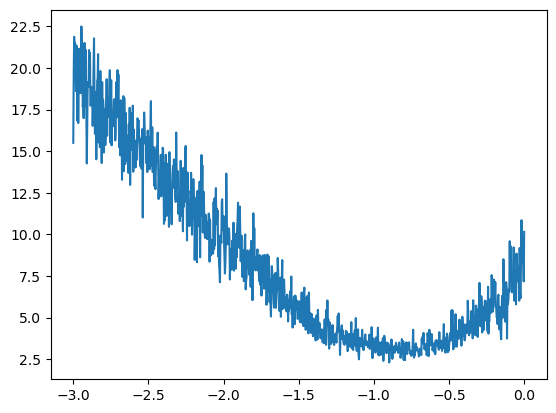

In [116]:
plt.plot(lri, lossi)

In [143]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts/counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
loss = F.cross_entropy(logits, Y)
print(loss.item())

2.4209306240081787


In [124]:
print(loss.item())


2.4032657146453857


In [207]:
# train/test split 80-10-10
# build the dataset
def build_dataset(words, block_size=3):
    
#     block_size: context length: how many chs do we take to predict the next one. It's fixed here. 
    X, Y = [], []
    for w in words:
    #     print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
    #         print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1], 4)
Xdev, Ydev = build_dataset(words[n1:n2], 4)
Xte, Yte = build_dataset(words[n2:], 4)


torch.Size([182441, 4]) torch.Size([182441])
torch.Size([22902, 4]) torch.Size([22902])
torch.Size([22803, 4]) torch.Size([22803])


In [214]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((40, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

sum(p.nelement() for p in parameters)



In [ ]:
for p in parameters: 
    p.requires_grad = True

In [215]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [216]:
lri = []
lossi = []
stepi = []

In [220]:


for i in range(1000000):
#     minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (64,))

    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 40) @ W1 + b1)
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts/counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())

    # backwoard pass
    for p in parameters: 
        p.grad = None
    loss.backward()
    # update
#     lr = lrs[i]
    if i < 500000:
        lr = 0.1
    else:
        lr = 0.01
    for p in parameters: 
        p.data += -lr * p.grad
        
#     lri.append(lre[i])
    # keep stats
    stepi.append(i)
    lossi.append(loss.log10().item())

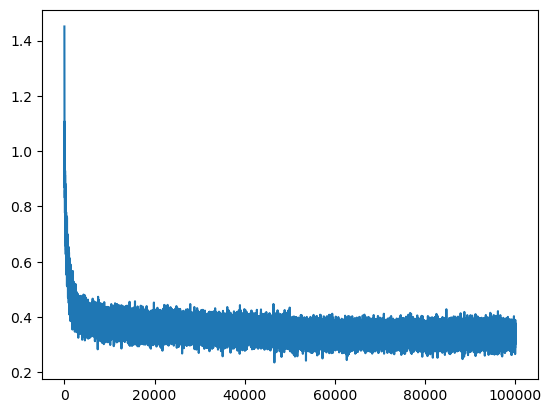

In [205]:
plt.plot(stepi, lossi)

In [222]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 40) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts/counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1129987239837646


In [221]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, 40) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts/counts.sum(1, keepdims=True)
# loss = -prob[torch.arange(X.shape[0]), Y].log().mean()
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

1.9413890838623047


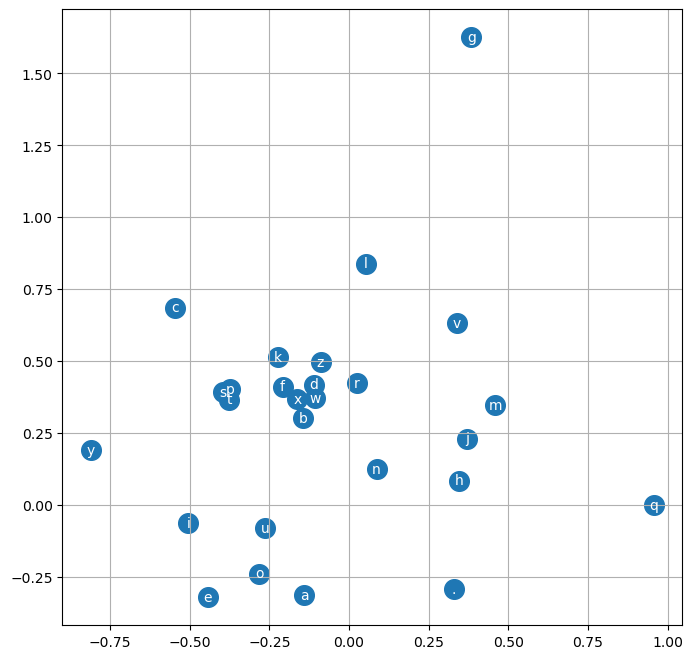

In [166]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [193]:
# sample from the model 
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    block_size = 3
    out = []
    context = [0] * block_size
    while True: 
        emb = C[torch.tensor([context])] #(1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples=1, generator = g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))

carmah.
ambril.
khi.
mili.
taty.
skandane.
mahnen.
deliah.
jareen.
nellara.
chaiivia.
legg.
dham.
joim.
quint.
sulin.
alian.
quinathon.
jaryni.
jace.
